# TASK 6 - Advanced Data Analysis Techniques

##### Submitted by: Ghaayathri Devi K

## Description:
Apply advanced statistical and analytical
methods to solve complex problems.

## Responsibility:
1. Implement time series analysis for
forecasting trends and seasonality.
2. Perform sentiment analysis or text mining on
unstructured data.
3. Explore clustering or classification
techniques for segmentation and pattern
recognition.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from google.colab import drive

In [3]:
# Mount google drive (authentication required)
drive.mount('/content/drive')

Mounted at /content/drive


## 2. Sentiment Analysis on unstructured data

In [4]:
# File path
file_path = '/content/drive/My Drive/MainFlow Services & Technologies Internship/Task 6/twitter.csv'

In [7]:
column_names = ['label', 'time', 'date', 'query', 'username', 'text']
df = pd.read_csv(file_path, encoding = "ISO-8859-1", names = column_names, header=None)
df.head()

,label,time,date,query,username,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [10]:
df.tail()

,label,time,date,query,username,text
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...
1599999,4,2193602129,Tue Jun 16 08:40:50 PDT 2009,NO_QUERY,RyanTrevMorris,happy #charitytuesday @theNSPCC @SparksCharity...


In [12]:
df.columns

Index(['label', 'time', 'date', 'query', 'username', 'text'], dtype='object')

In [13]:
df.shape # 1600000 tweets with 6 features are present in the dataset

(1600000, 6)

In [14]:
len(df) # Length of the data

1600000

In [8]:
# Information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column    Non-Null Count    Dtype 
---  ------    --------------    ----- 
 0   label     1600000 non-null  int64 
 1   time      1600000 non-null  int64 
 2   date      1600000 non-null  object
 3   query     1600000 non-null  object
 4   username  1600000 non-null  object
 5   text      1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [16]:
# Data types of all the columns
df.dtypes

label        int64
time         int64
date        object
query       object
username    object
text        object
dtype: object

In [17]:
# Checking for null values in the dataset
df.isnull().sum()

label       0
time        0
date        0
query       0
username    0
text        0
dtype: int64

In [19]:
# Just using the text and the label column
df = df[['text', 'label']]

In [21]:
# Assigning  1 to Positive sentiment 4
df['label'][df['label']==4] = 1

In [22]:
# Seperating positive and negative tweets
data_pos = df[df['label']==1]
data_neg = df[df['label']==0]

In [27]:
# Just taking 1/4th of the data
data_pos = data_pos.iloc[:20000]
data_neg = data_neg.iloc[:20000]

In [28]:
df = pd.concat([data_pos, data_neg])

In [29]:
df['text'] = df['text'].str.lower()

In [30]:
df['text'].tail()

19995    not much time off this weekend, work trip to m...
19996                            one more day of holidays 
19997    feeling so down right now .. i hate you damn h...
19998    geez,i hv to read the whole book of personalit...
19999    i threw my sign at donnie and he bent over to ...
Name: text, dtype: object

In [32]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [33]:
# Cleaning and removinf stopwords
stopwords_list = stopwords.words('english')

In [34]:
', '.join(stopwords_list)

"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

In [35]:
STOPWORDS = set(stopwords_list)

In [37]:
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

df['text'] = df['text'].apply(lambda text: cleaning_stopwords(text))
df.head()

,text,label
800000,love @health4uandpets u guys r best!!,1
800001,im meeting one besties tonight! cant wait!! - ...,1
800002,"@darealsunisakim thanks twitter add, sunisa! g...",1
800003,sick really cheap hurts much eat real food plu...,1
800004,@lovesbrooklyn2 effect everyone,1


In [38]:
import string

In [39]:
# Cleaning and removing punctuations

english_punctuations = string.punctuation
punctuations_list = english_punctuations

def cleaning_punctuations(text):
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)

df['text'] = df['text'].apply(lambda x: cleaning_punctuations(x))
df.head()

,text,label
800000,love health4uandpets u guys r best,1
800001,im meeting one besties tonight cant wait girl...,1
800002,darealsunisakim thanks twitter add sunisa got ...,1
800003,sick really cheap hurts much eat real food plu...,1
800004,lovesbrooklyn2 effect everyone,1


In [40]:
import re

In [41]:
# Removing repeating charecters
def remove_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)

df['text'] = df['text'].apply(lambda x: remove_repeating_char(x))
df.head()

,text,label
800000,love health4uandpets u guys r best,1
800001,im meeting one besties tonight cant wait girl...,1
800002,darealsunisakim thanks twitter add sunisa got ...,1
800003,sick really cheap hurts much eat real food plu...,1
800004,lovesbrooklyn2 effect everyone,1


In [42]:
# Removing email

def cleaning_email(text):
    pattern = r'@[^\s]+'
    return re.sub(pattern, '', text)

df['text'] = df['text'].apply(lambda x: cleaning_email(x))
df.head()

,text,label
800000,love health4uandpets u guys r best,1
800001,im meeting one besties tonight cant wait girl...,1
800002,darealsunisakim thanks twitter add sunisa got ...,1
800003,sick really cheap hurts much eat real food plu...,1
800004,lovesbrooklyn2 effect everyone,1


In [43]:
# Remove URLs

def cleaning_URLs(data):
    return re.sub('((www\.[^\s]+)|(https?://[^\s]+))', '', data)

df['text'] = df['text'].apply(lambda x: cleaning_URLs(x))
df.head()

,text,label
800000,love health4uandpets u guys r best,1
800001,im meeting one besties tonight cant wait girl...,1
800002,darealsunisakim thanks twitter add sunisa got ...,1
800003,sick really cheap hurts much eat real food plu...,1
800004,lovesbrooklyn2 effect everyone,1


In [44]:
# Removing numeric numbers

def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)

df['text'] = df['text'].apply(lambda x: cleaning_numbers(x))
df.head()

,text,label
800000,love healthuandpets u guys r best,1
800001,im meeting one besties tonight cant wait girl...,1
800002,darealsunisakim thanks twitter add sunisa got ...,1
800003,sick really cheap hurts much eat real food plu...,1
800004,lovesbrooklyn effect everyone,1


In [45]:
from nltk.tokenize import RegexpTokenizer

In [46]:
# Tokenization

tokenizer = RegexpTokenizer(r'\w+')
df['text'] = df['text'].apply(tokenizer.tokenize)
df.head()

,text,label
800000,"[love, healthuandpets, u, guys, r, best]",1
800001,"[im, meeting, one, besties, tonight, cant, wai...",1
800002,"[darealsunisakim, thanks, twitter, add, sunisa...",1
800003,"[sick, really, cheap, hurts, much, eat, real, ...",1
800004,"[lovesbrooklyn, effect, everyone]",1


In [47]:
# Stemming
from nltk.stem.porter import PorterStemmer

In [53]:
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return text

df['text']= df['text'].apply(lambda x: stemming_on_text(x))
df['text'].head()

800000               [love, healthuandpet, u, guy, r, best]
800001    [im, meet, one, besti, tonight, cant, wait, gi...
800002    [darealsunisakim, thank, twitter, add, sunisa,...
800003    [sick, realli, cheap, hurt, much, eat, real, f...
800004                     [lovesbrooklyn, effect, everyon]
Name: text, dtype: object

In [54]:
# Lemmatization
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [55]:
lm = nltk.WordNetLemmatizer()

def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return text  # Return the lemmatized text

df['text']= df['text'].apply(lambda x: lemmatizer_on_text(x))
df['text'].head()

800000               [love, healthuandpet, u, guy, r, best]
800001    [im, meet, one, besti, tonight, cant, wait, gi...
800002    [darealsunisakim, thank, twitter, add, sunisa,...
800003    [sick, realli, cheap, hurt, much, eat, real, f...
800004                     [lovesbrooklyn, effect, everyon]
Name: text, dtype: object

In [56]:
# Seperating input feature and label

X = df.text
y = df.label

In [60]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence

In [61]:
tok = Tokenizer(num_words=200)
tok.fit_on_texts(X)
sequences = tok.texts_to_sequences(X)
sequences_matrix = sequence.pad_sequences(sequences, maxlen=500)

In [62]:
sequences_matrix.shape

(40000, 500)

In [63]:
# Test train splitting of the data
from sklearn.model_selection import train_test_split

In [64]:
X_train, X_test, Y_train, Y_test = train_test_split(sequences_matrix, y, test_size=0.3, random_state=2)

In [65]:
# Model training
from tensorflow.keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import RMSprop

In [66]:
def tensorflow_based_model(): #Defined tensorflow_based_model function for training tenforflow based model
    inputs = Input(name='inputs',shape=[max_len])#step1
    layer = Embedding(2000,50,input_length=max_len)(inputs) #step2
    layer = LSTM(64)(layer) #step3
    layer = Dense(256,name='FC1')(layer) #step4
    layer = Activation('relu')(layer) # step5
    layer = Dropout(0.5)(layer) # step6
    layer = Dense(1,name='out_layer')(layer) #step4 again but this time its giving only one output as because we need to classify the tweet as positive or negative
    layer = Activation('sigmoid')(layer) #step5 but this time activation function is sigmoid for only one output.
    model = Model(inputs=inputs,outputs=layer) #here we are getting the final output value in the model for classification
    return model #function returning the value when we call it

In [68]:
# Model compilation
max_len = 500
model = tensorflow_based_model() # here we are calling the function of created model
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

In [69]:
history=model.fit(X_train,Y_train,batch_size=80,epochs=6, validation_split=0.1)# training of model
print('Training finished !!')

Epoch 1/6
315/315 [==============================] - 138s 427ms/step - loss: 0.6327 - accuracy: 0.6285 - val_loss: 0.5857 - val_accuracy: 0.6793
Epoch 2/6
315/315 [==============================] - 134s 426ms/step - loss: 0.5842 - accuracy: 0.6783 - val_loss: 0.5791 - val_accuracy: 0.6700
Epoch 3/6
315/315 [==============================] - 134s 426ms/step - loss: 0.5834 - accuracy: 0.6795 - val_loss: 0.5791 - val_accuracy: 0.6804
Epoch 4/6
315/315 [==============================] - 134s 425ms/step - loss: 0.5832 - accuracy: 0.6789 - val_loss: 0.5820 - val_accuracy: 0.6818
Epoch 5/6
315/315 [==============================] - 134s 426ms/step - loss: 0.5787 - accuracy: 0.6828 - val_loss: 0.5779 - val_accuracy: 0.6854
Epoch 6/6
315/315 [==============================] - 134s 427ms/step - loss: 0.5749 - accuracy: 0.6868 - val_loss: 0.5793 - val_accuracy: 0.6650
Training finished !!


In [70]:
# Model Evaluation
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report, confusion_matrix
plt.style.use('ggplot')
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.cm as cm
from matplotlib import rcParams
from collections import Counter
%matplotlib inline

In [71]:
# Accuracy
accr1 = model.evaluate(X_test,Y_test)
print('Test set\n  Accuracy: {:0.2f}'.format(accr1[1])) #the accuracy of the model on test data is given below

375/375 [==============================] - 30s 76ms/step - loss: 0.5758 - accuracy: 0.6800
Test set
  Accuracy: 0.68


In [72]:
y_pred = model.predict(X_test) #getting predictions on the trained model
y_pred = (y_pred > 0.5)

375/375 [==============================] - 29s 75ms/step


[[4677 1332]
 [2508 3483]]




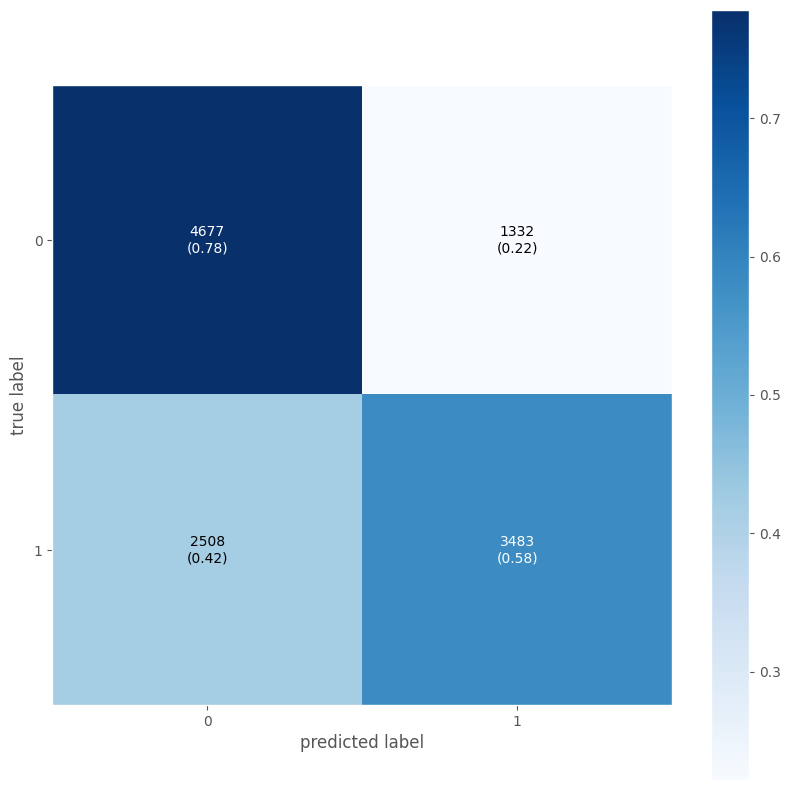

In [73]:
# Confusion Matrix
CR=confusion_matrix(Y_test, y_pred)
print(CR)
print('\n')

fig, ax = plot_confusion_matrix(conf_mat=CR,figsize=(10, 10),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

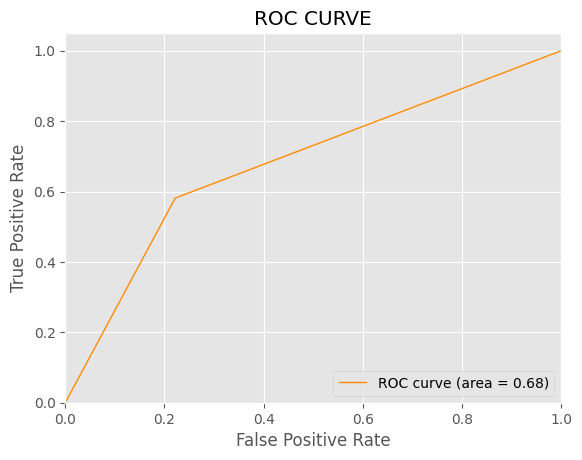

In [74]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(Y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()